In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset  = pd.read_csv('Churn_Modelling.csv')
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
X = dataset.iloc[:, 3: -1]
y = dataset.iloc[:, -1]

In [4]:
#One_Hot_Encoding for Geography & Gender
geography = pd.get_dummies(X['Geography'], drop_first=True)
gender = pd.get_dummies(X["Gender"], drop_first=True)

In [5]:
#Concatenating The Geography & Gender to X
X = pd.concat([X,geography, gender], axis=1)
X = X.drop(["Gender", "Geography"], axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [6]:
#Spliting The Dataset into Training & Testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
# lets make ANN
#Implementing Keras Library

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU,ELU
from tensorflow.keras.layers import Dropout

In [9]:
#Initaiting The ANN
classifier = Sequential()

In [10]:
#Adding The input layer and first hidden laayer
classifier.add(Dense(units = 6, kernel_initializer='he_uniform', activation='relu',input_dim=11))

#Adding The second hidden laayer
classifier.add(Dense(units = 6, kernel_initializer='he_uniform', activation='relu'))

#Adding The Output layers
classifier.add(Dense(units = 1, kernel_initializer='glorot_uniform', activation='sigmoid'))

# Compiling The ANN
classifier.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [13]:
import numpy as np
from scipy import ndimage

img = np.expand_dims(ndimage.imread('NN.PNG'),0)
#plt.imshow(img[0])

AttributeError: module 'scipy.ndimage' has no attribute 'imread'

In [14]:
#Fitting The ANN to Training set
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=100)

Train on 5359 samples, validate on 2641 samples
Epoch 1/100
5359/5359 [==============================] - 1s 143us/sample - loss: 0.4249 - accuracy: 0.8127 - val_loss: 0.4404 - val_accuracy: 0.8058
Epoch 2/100
5359/5359 [==============================] - 1s 148us/sample - loss: 0.4214 - accuracy: 0.8156 - val_loss: 0.4372 - val_accuracy: 0.8050
Epoch 3/100
5359/5359 [==============================] - 1s 145us/sample - loss: 0.4179 - accuracy: 0.8173 - val_loss: 0.4338 - val_accuracy: 0.8099
Epoch 4/100
5359/5359 [==============================] - 1s 142us/sample - loss: 0.4143 - accuracy: 0.8203 - val_loss: 0.4302 - val_accuracy: 0.8133
Epoch 5/100
5359/5359 [==============================] - 1s 146us/sample - loss: 0.4105 - accuracy: 0.8238 - val_loss: 0.4267 - val_accuracy: 0.8152
Epoch 6/100
5359/5359 [==============================] - 1s 141us/sample - loss: 0.4069 - accuracy: 0.8283 - val_loss: 0.4230 - val_accuracy: 0.8175
Epoch 7/100
5359/5359 [==============================] - 1

5359/5359 [==============================] - 1s 159us/sample - loss: 0.3321 - accuracy: 0.8630 - val_loss: 0.3577 - val_accuracy: 0.8527
Epoch 56/100
5359/5359 [==============================] - 1s 204us/sample - loss: 0.3319 - accuracy: 0.8630 - val_loss: 0.3573 - val_accuracy: 0.8538
Epoch 57/100
5359/5359 [==============================] - 1s 139us/sample - loss: 0.3316 - accuracy: 0.8638 - val_loss: 0.3573 - val_accuracy: 0.8542
Epoch 58/100
5359/5359 [==============================] - 1s 139us/sample - loss: 0.3316 - accuracy: 0.8638 - val_loss: 0.3573 - val_accuracy: 0.8538
Epoch 59/100
5359/5359 [==============================] - 1s 141us/sample - loss: 0.3313 - accuracy: 0.8621 - val_loss: 0.3569 - val_accuracy: 0.8538
Epoch 60/100
5359/5359 [==============================] - 1s 137us/sample - loss: 0.3309 - accuracy: 0.8636 - val_loss: 0.3573 - val_accuracy: 0.8523
Epoch 61/100
5359/5359 [==============================] - 1s 143us/sample - loss: 0.3309 - accuracy: 0.8634 - val

In [15]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred >0.5)

In [16]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1512,   83],
       [ 193,  212]], dtype=int64)

In [17]:
#Calculate The Accuaracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred, y_test)
score

0.862

In [19]:
#list all data in history
print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


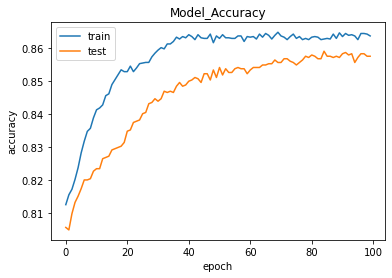

In [28]:
#Summerize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model_Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="upper left")
plt.show()

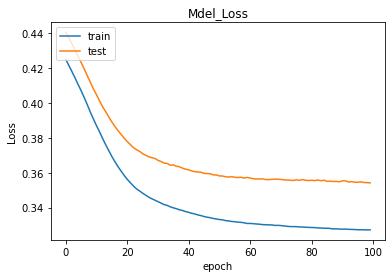

In [30]:
#Summerize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Mdel_Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc="upper left")
plt.show()